# Create Grass Data

![Grass Photo](images/grass/grass1.jpg)
![Grass Photo](images/grass/grass2.jpg)
![Grass Photo](images/grass/grass3.jpg)

* This notebook produces datasets using the same dimensions as MNIST.
* Each dataset contains 70,000, 28x28 grayscale tiles.
* Each tile is randomly cropped from an larger photo of grass and converted to grayscale.
* The original color grass photos are found in:
  - `images/grass`.
* The datasets are saved in HDF5 format as:
  - `data/grass1.h5py`, and
  - `data/grass2.h5py`.

Requires the following libraries:

- `numpy`
- `wand` (ctypes API for ImageMagick)
- `h5py`

In [1]:
# brew install imagemagick@6
# pip3 install wand --user

# Important: set home path for ImageMagick
%env MAGICK_HOME=/usr/local/Cellar/imagemagick@6/6.9.10-14/

import itertools
import glob
import numpy as np
from wand.image import Image
import h5py

env: MAGICK_HOME=/usr/local/Cellar/imagemagick@6/6.9.10-14/


In [2]:
IMAGE_DIR = "images/grass"
DATA_DIR = "data/"

In [9]:
def load_sources(path):
    sources = []
    for file in glob.glob(path + "/*.jpg"):
        img = Image(filename=file)
        img.type = 'grayscale'
        img.format = 'gray'
        img.alpha_channel = False
        sources.append(img)
    return sources
    
def generate_patches(sources, w, h):
    while True:
        for i, img in enumerate(sources):
            yield i, random_crop(img, w, h)  

def random_crop(img, w, h):
    if img.width < w or img.height < h:
        raise Exception("Image is too small to crop")
    left = np.random.randint(0, img.width - w)
    top = np.random.randint(0, img.height - h)
    with img[left:left+w, top:top+h] as cropped:
        return cropped.clone()


def get_image_data(img):
    return np.asarray(bytearray(img.make_blob()), dtype=np.uint8)

def create_grass_data(fname, N):
    data = [(i, get_image_data(x)) for i, x in itertools.islice(generate_patches(sources, 28, 28), N)]
    X = np.vstack([p[1] for p in data])
    labels = np.array([p[0] for p in data])
    with h5py.File(fname, "w") as f:
        f["X"] = X
        f["labels"] = labels
    return X, labels

In [4]:
sources = load_sources(IMAGE_DIR)

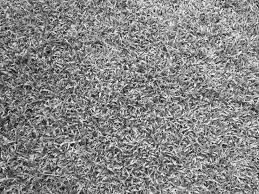

In [5]:
sources[1]

In [6]:
c1 = random_crop(sources[1], 28, 28)
c1

In [7]:
x1 = get_image_data(c1)
print(x1)
x1.shape

[181 202 201 193 197 155  75 113 180 167  94 102 123 132 149 121 117 132
 146 113 153 203 174  53  70 155 133 170 139 136 178 157 107  82  42  90
 185 175  75 131 118 100 151 142 185 122 112  75 126 160 163 158 230 233
  98 131 139 133 129 145 115  86  82 109 143 121 121 165 118 120 101 167
 161  98 150 145 163 177 204 231 238 191 118 121  60 113  75 133 134  79
 123 154 145  97  61 122 110  71  95 175 125 102 111  72 101 169 217 235
 185 168 178 211 145  81  67 147 138 128 141  88 147 131 153 173 230 209
 151 115  82 107 143 166 204 223 212 189  88  77  55 172 124  74 135 151
 121 130  99 148 136 174 173 112 184 135 182 144 156 182 218 200 129 161
 180  82 138 128  89 178 205 217 169 149  80 180 149 117 126 129 154 186
 167 171 195 204 214 195 207 166 103 168  87  95 165 150 176 180 205 114
 209  94  87 111 124 142  79  87 115  92 126 118  72 129 107 152 141 177
  59 175 105 151 128 146 173 111  91 151 146 154 157 160 112 140 144 166
 190  94 102  43 108 114 137 131 204 235 231 229 14

(784,)

In [8]:
import os

In [10]:
if not os.path.exists(DATA_DIR):
    os.mkdir(DATA_DIR)
np.random.seed(42) # for reproducability
create_grass_data(DATA_DIR + "grass1.hdf5", 70000)
create_grass_data(DATA_DIR + "grass2.hdf5", 70000)

(array([[120, 107, 117, ..., 129, 121, 127],
        [113, 110, 123, ...,  77, 102, 194],
        [133, 176, 102, ..., 165, 163, 174],
        ...,
        [150, 184, 173, ..., 135, 120, 114],
        [175, 170, 178, ..., 153, 163, 170],
        [147, 165, 167, ..., 142, 161, 142]], dtype=uint8),
 array([0, 1, 2, ..., 4, 5, 6]))